In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2 as cv
import glob
import random
import shutil
import os
from sklearn.utils import shuffle
from datetime import datetime
from tqdm.notebook import trange, tqdm

# Dataset description

The Cifar-10 dataset includes 60000 images of 10 classes. The training set inclued 50000 images (5000 from each class). testing set inclues 10000 images (1000 from each class).

# Data generation from images (Training)

In [2]:
'''Training set containing 50000 images and 10 classes'''

notebook_path = os.path.abspath("Cifer10_data_from_images.ipynb")
train_path_0 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\airplane")
train_path_1 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\automobile")
train_path_2 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\bird")
train_path_3 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\cat")
train_path_4 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\deer")
train_path_5 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\dog")
train_path_6 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\frog")
train_path_7 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\horse")
train_path_8 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\ship")
train_path_9 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\train\\truck")

In [3]:
'''Function to read images from the folder and append it to training dataset'''

X_train = []
y_train = []

def readImage(path,label_name,sample,label):
    for img in path:
        n = cv.imread(img)
        sample.append(n)
        label.append(label_name)

In [4]:
'''Reading images from all 10 folders using the readImage() function'''

path_0 = glob.glob(train_path_0+"\\*.jpg")
path_1 = glob.glob(train_path_1+"\\*.jpg")
path_2 = glob.glob(train_path_2+"\\*.jpg")
path_3 = glob.glob(train_path_3+"\\*.jpg")
path_4 = glob.glob(train_path_4+"\\*.jpg")
path_5 = glob.glob(train_path_5+"\\*.jpg")
path_6 = glob.glob(train_path_6+"\\*.jpg")
path_7 = glob.glob(train_path_7+"\\*.jpg")
path_8 = glob.glob(train_path_8+"\\*.jpg")
path_9 = glob.glob(train_path_9+"\\*.jpg")

readImage(path_0,0,X_train,y_train)
readImage(path_1,1,X_train,y_train)
readImage(path_2,2,X_train,y_train)
readImage(path_3,3,X_train,y_train)
readImage(path_4,4,X_train,y_train)
readImage(path_5,5,X_train,y_train)
readImage(path_6,6,X_train,y_train)
readImage(path_7,7,X_train,y_train)
readImage(path_8,8,X_train,y_train)
readImage(path_9,9,X_train,y_train)

In [5]:
'''Converting the list to a numpy array and shuffling the arrays to remove order'''
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train,X_train = shuffle(y_train,X_train)

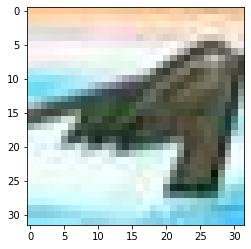

In [6]:
#Ploting a training image
plt.figure()
plt.imshow(X_train[7])
plt.show()

# Data generation from images (Testing)

In [7]:
test_path_0 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\airplane")
test_path_1 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\automobile")
test_path_2 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\bird")
test_path_3 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\cat")
test_path_4 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\deer")
test_path_5 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\dog")
test_path_6 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\frog")
test_path_7 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\horse")
test_path_8 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\ship")
test_path_9 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test\\truck")

In [8]:
X_test = []
y_test = []

In [9]:
path_0 = glob.glob(test_path_0+"\\*.jpg")
path_1 = glob.glob(test_path_1+"\\*.jpg")
path_2 = glob.glob(test_path_2+"\\*.jpg")
path_3 = glob.glob(test_path_3+"\\*.jpg")
path_4 = glob.glob(test_path_4+"\\*.jpg")
path_5 = glob.glob(test_path_5+"\\*.jpg")
path_6 = glob.glob(test_path_6+"\\*.jpg")
path_7 = glob.glob(test_path_7+"\\*.jpg")
path_8 = glob.glob(test_path_8+"\\*.jpg")
path_9 = glob.glob(test_path_9+"\\*.jpg")

readImage(path_0,0,X_test,y_test)
readImage(path_1,1,X_test,y_test)
readImage(path_2,2,X_test,y_test)
readImage(path_3,3,X_test,y_test)
readImage(path_4,4,X_test,y_test)
readImage(path_5,5,X_test,y_test)
readImage(path_6,6,X_test,y_test)
readImage(path_7,7,X_test,y_test)
readImage(path_8,8,X_test,y_test)
readImage(path_9,9,X_test,y_test)

In [10]:
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test,X_test = shuffle(y_test,X_test)

# Creating a smaller test batch of 10 elements from each class

using all 10000 of the test images for varying K values takes an extremely long time. To reduce the time, smaller test batches of 100 images (10 from each class) has been moved to a folder named test_batch

In [11]:
'''Moving 10 images from the designated folder of each class to test_batch folder'''

test_batch_path_0 = os.path.join(os.path.dirname(notebook_path), "CIFAR-10-images-master\\test")

os.chdir(test_batch_path_0)
if os.path.isdir('airplane/test_batch') is False:
    os.makedirs('airplane/test_batch')
    for airplane in random.sample(path_0,10):
        shutil.move(airplane,'airplane/test_batch')
        
if os.path.isdir('automobile/test_batch') is False:
    os.makedirs('automobile/test_batch')
    for airplane in random.sample(path_1,10):
        shutil.move(airplane,'automobile/test_batch')
        
if os.path.isdir('bird/test_batch') is False:
    os.makedirs('bird/test_batch') 
    for airplane in random.sample(path_2,10):
        shutil.move(airplane,'bird/test_batch')
        
if os.path.isdir('cat/test_batch') is False:
    os.makedirs('cat/test_batch')
    for airplane in random.sample(path_3,10):
        shutil.move(airplane,'cat/test_batch')
        
if os.path.isdir('deer/test_batch') is False:
    os.makedirs('deer/test_batch') 
    for airplane in random.sample(path_4,10):
        shutil.move(airplane,'deer/test_batch')
        
if os.path.isdir('dog/test_batch') is False:
    os.makedirs('dog/test_batch') 
    for airplane in random.sample(path_5,10):
        shutil.move(airplane,'dog/test_batch')
        
if os.path.isdir('frog/test_batch') is False:
    os.makedirs('frog/test_batch') 
    for airplane in random.sample(path_6,10):
        shutil.move(airplane,'frog/test_batch')
        
if os.path.isdir('horse/test_batch') is False:
    os.makedirs('horse/test_batch')
    for airplane in random.sample(path_7,10):
        shutil.move(airplane,'horse/test_batch')
        
if os.path.isdir('ship/test_batch') is False:
    os.makedirs('ship/test_batch') 
    for airplane in random.sample(path_8,10):
        shutil.move(airplane,'ship/test_batch')
        
if os.path.isdir('truck/test_batch') is False:
    os.makedirs('truck/test_batch')
    for airplane in random.sample(path_9,10):
        shutil.move(airplane,'truck/test_batch')


In [12]:
X_test_batch = []
y_test_batch = []

In [13]:
batch_path_0 = glob.glob(test_path_0+"\\test_batch\\*.jpg")
batch_path_1 = glob.glob(test_path_1+"\\test_batch\\*.jpg")
batch_path_2 = glob.glob(test_path_2+"\\test_batch\\*.jpg")
batch_path_3 = glob.glob(test_path_3+"\\test_batch\\*.jpg")
batch_path_4 = glob.glob(test_path_4+"\\test_batch\\*.jpg")
batch_path_5 = glob.glob(test_path_5+"\\test_batch\\*.jpg")
batch_path_6 = glob.glob(test_path_6+"\\test_batch\\*.jpg")
batch_path_7 = glob.glob(test_path_7+"\\test_batch\\*.jpg")
batch_path_8 = glob.glob(test_path_8+"\\test_batch\\*.jpg")
batch_path_9 = glob.glob(test_path_9+"\\test_batch\\*.jpg")

readImage(batch_path_0,0,X_test_batch,y_test_batch)
readImage(batch_path_1,1,X_test_batch,y_test_batch)
readImage(batch_path_2,2,X_test_batch,y_test_batch)
readImage(batch_path_3,3,X_test_batch,y_test_batch)
readImage(batch_path_4,4,X_test_batch,y_test_batch)
readImage(batch_path_5,5,X_test_batch,y_test_batch)
readImage(batch_path_6,6,X_test_batch,y_test_batch)
readImage(batch_path_7,7,X_test_batch,y_test_batch)
readImage(batch_path_8,8,X_test_batch,y_test_batch)
readImage(batch_path_9,9,X_test_batch,y_test_batch)

In [14]:
X_test_batch = np.array(X_test_batch)
y_test_batch = np.array(y_test_batch)
y_test_batch,X_test_batch = shuffle(y_test_batch,X_test_batch)

# Supporting function for K-nearest neighbor implementation

In [15]:
'''Function to count number of instances of a single class in list of classes'''

def count_class(array,classname):
    count = 0
    indecies = np.where(np.equal(array,classname))
    count = np.array(indecies).size
    return count

In [16]:
'''Function to find the class which occured the maximum times in a list of classes'''

def majority(array):
    count_list = []
   
    for i in range(10):
        count_list.append(count_class(array,i))
    majority = np.argmax(count_list)
    
    max_count = max(count_list)
    most_occured_class = []
    
    for c in range(10):
        if(max_count==count_list[c]):
            most_occured_class.append(c)
    
    return most_occured_class

# Function to predicts the class of an image by K-nearest neighbor

In [17]:
def KNN(X_test,k):
    neighbors = np.zeros(50000,dtype=int)
    x_train = X_train.reshape(50000,3072).astype(np.int64)
    x_test = X_test.reshape(3072).astype(np.int64)   

    #Distance calculation
    for img in range(0,50000):
        dist = np.sqrt(sum(np.square(x_train[img]-x_test)))
        neighbors[img] = dist
    
    #Getting the index of sorted distance values 
    nn_index = np.argsort(neighbors)
    #Selecting k number of values from the sorted distnace index array (These are the nearest neighbors)
    nn_index = nn_index[0:k]
    #Finding the class of the nearest neighbors
    nn_class = y_train[nn_index]
    
    nn_dist = [] 
    temp = []
    y_pred = 0
    
    #Finding the predicted class by majority voting
    
    if(k<=2):
        y_pred = nn_class[0]
    if(k>2):
        most_occured_class = majority(nn_class)
        
        if(len(most_occured_class)>1):
            
            for i in range(len(most_occured_class)):
                temp = []
                for j in range(k):                    
                    if (nn_class[j]==most_occured_class[i]):
                        temp.append(neighbors[nn_index[j]])
                nn_dist.append(temp)
                
            x = np.argmin(nn_dist,axis=1)
            min_dist = nn_dist[0][x[0]]
            y_pred = most_occured_class[0]
            
            for m in range(len(most_occured_class)):
                if(nn_dist[m][x[m]]<min_dist):
                    min_dist = nn_dist[m][x[m]]
                    y_pred = most_occured_class[m]
        else:
            y_pred = most_occured_class[0]
              
    return y_pred

# Calculation of test accuracy for k value 1-20

In [18]:
def number_of_correctly_classified_images(x_test,y_test,numberOfTestImages,k):
    start = datetime.now()
    count = 0
    accuracy = 0
    y_pred = np.zeros(numberOfTestImages,dtype=int)
    
    for i in trange(numberOfTestImages):
        pred = KNN(x_test[i],k)
        y_pred[i] = pred
        if (y_test[i] == pred):
            count+=1
    accuracy = (count*100)/numberOfTestImages
    stop = datetime.now()
    execution_time = (stop-start)
    execution_time = execution_time
    print(f"Correctly classified image: {count}; Accuracy: {accuracy}; Execution time: {execution_time}\n")
    return accuracy

In [19]:
accuracy = []
k_values = np.arange(1,21)

for k in range(1,21):
    print(f'For K={k}: ')
    accuracy.append(number_of_correctly_classified_images(X_test_batch,y_test_batch,100,k))    

For K=1: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 35; Accuracy: 35.0; Execution time: 0:15:53.912264

For K=2: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 35; Accuracy: 35.0; Execution time: 0:16:25.398359

For K=3: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 37; Accuracy: 37.0; Execution time: 0:15:54.878147

For K=4: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 34; Accuracy: 34.0; Execution time: 0:15:45.289935

For K=5: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 33; Accuracy: 33.0; Execution time: 0:15:48.549027

For K=6: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 32; Accuracy: 32.0; Execution time: 0:15:45.163680

For K=7: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 33; Accuracy: 33.0; Execution time: 0:15:45.984690

For K=8: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 30; Accuracy: 30.0; Execution time: 0:15:44.819967

For K=9: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 32; Accuracy: 32.0; Execution time: 0:15:48.642394

For K=10: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 31; Accuracy: 31.0; Execution time: 0:16:00.829940

For K=11: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 31; Accuracy: 31.0; Execution time: 0:16:02.132802

For K=12: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 32; Accuracy: 32.0; Execution time: 0:16:37.924809

For K=13: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 28; Accuracy: 28.0; Execution time: 0:15:47.636281

For K=14: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 28; Accuracy: 28.0; Execution time: 0:15:42.269792

For K=15: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 28; Accuracy: 28.0; Execution time: 0:15:40.331736

For K=16: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 28; Accuracy: 28.0; Execution time: 0:15:57.876393

For K=17: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 29; Accuracy: 29.0; Execution time: 0:15:48.542498

For K=18: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 30; Accuracy: 30.0; Execution time: 0:16:03.426263

For K=19: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 30; Accuracy: 30.0; Execution time: 0:16:14.605118

For K=20: 


  0%|          | 0/100 [00:00<?, ?it/s]

Correctly classified image: 31; Accuracy: 31.0; Execution time: 0:15:54.636913



# Plotting accuracy against different K values

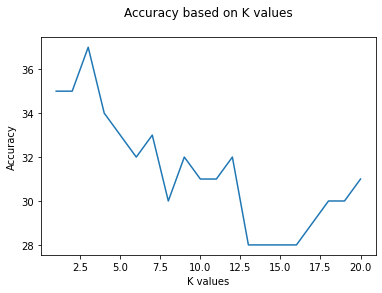

In [20]:
accuracy = np.array(accuracy)
k_values = np.array(k_values)

plt.figure()
plt.plot(k_values,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("K values")
plt.title("Accuracy based on K values\n")
plt.show()

# Discussion

In this example of classification of CFAR-10 dataset pure machine learning approach has been taken. The difference between the pixel values of the training images and the test images is used as distance between each training image and test image. These distance values are then used to find K number of nearest neighbors for each test image among the 50000 training image. After than, majority voting method is used for K value above 2 to find the optimal prediction.Prediction has been made for 100 test images using K value from 1-20.

In this approach the accuracy for 100 test images is at maximum 37% using K value as 3. By analyzing the graph, it is seen that by varying the value of K, the accuracy ranges from 28%-37%. As K is a hyperparameter decision on the optimal value of K can only be made through emperical calculation. In this case K value 1-3 seems optimal. K value may change by using more of the test data but as testing for the K value using 10000 images was extremly time consuing (About 2 Hours 45 mins for each K value) The test set has been reduced to 100 images only.

Finally, taking pure machine learning approach for image classification is not yeilding satisfactory rate of accuracy. The prediction model using KNN is an extremely naive approach. This does not take into consideration any pattern, curve or shape but only the pixel value. This approach also has a huge increase in the time complexity with the increase of image data. The accuracy of image predictaion can be incraesed darmatically using a neural netwrok.So, it can be crearly deduced that the pure machine learning approach is inefficient. 